In [1]:
import pandas as pd
from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
import random
import datetime
from pyecharts.globals import CurrentConfig, NotebookType  
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

In [2]:
data = pd.read_csv("canshu.csv",header=None)

In [192]:
 for i in range(data.shape[0]):
        data.iloc[i,:] = data.iloc[i,:].rank(ascending=False)

In [190]:
data.mean()

0    6.821429
1    5.285714
2    4.625000
3    3.464286
4    5.339286
5    4.678571
6    4.017857
7    1.767857
dtype: float64

In [162]:
x_data = ["Standard", "CFS", "HIP", "MR",'SHSEL','PRV','HHFS']
y_data = [data[0],data[1],data[2],data[3],data[4],data[5],data[6]]

Box = Boxplot().set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=16),))
Box.add_xaxis(x_data)
Box.add_yaxis("GM值排名箱线图", Box.prepare_data(y_data))
Box.render("ce.html")

'C:\\Users\\Administrator\\Algorithm\\ce.html'

In [160]:
from pyecharts.charts import Bar
attr = ["Standard", "CFS", "HIP", "MR",'SHSEL','PRV','HHFS']
# v1 = [data[0].mean().round(2),
#       data[1].mean().round(2),data[2].mean().round(2),
#       data[3].mean().round(2),data[4].mean().round(2),
#       data[5].mean().round(2),data[6].mean().round(2)]
v1 = [5.3,3.0,5.9,3.9,3.4,4.4,2.1]
Box = (
Bar().add_xaxis(x_data).add_yaxis("AUC指标的平均排名", v1).set_global_opts(xaxis_opts=opts.AxisOpts(
    axislabel_opts=opts.LabelOpts(font_size=16#字的大小
                                                                    ,rotate=0 #字旋转的角度
                                             ),##坐标轴标签的格式配置
))

)
Box.render("ce.html")

'C:\\Users\\Administrator\\Algorithm\\ce.html'

In [179]:
data["v2"] = (data[1]+data[5])/2
data["v3"] = (data[2]+data[4])/2
data.to_csv("hhfs效果.csv")

In [175]:
from pyecharts.charts  import Line

attr = [1]
v1 = data[6]
v2 = (data[1]+data[5])/2
v3 = (data[2]+data[4])/2
line = Line().set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=16),))
line.add_xaxis(attr)
line.add_yaxis("GM值排名箱线图", v1)
line.add_yaxis("GM值排名箱线图1", v2)
line.add_yaxis("GM值排名箱线图1x", v3)

line.render("ce.html")

'C:\\Users\\Administrator\\Algorithm\\ce.html'

In [102]:
bar1=(
       Bar( )
       .add_xaxis(['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月'])
       .add_yaxis('数量'##系列的名称
                  ,[1000,2000,3000,5000,8000,3700,5800,7900,12000,10000,9000,8000] ##系列的数值
                  )
       .set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=30#字的大小
                                                                    ,rotate=0 #字旋转的角度
                                             )##坐标轴标签的格式配置
                                     )
                        )
       )
 
 
bar1.render('bar1.html') ###输出html文件

'C:\\Users\\Administrator\\Algorithm\\bar1.html'

In [199]:
import scipy
import scipy.stats
from scipy.stats import friedmanchisquare
r = friedmanchisquare(data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7])
r

FriedmanchisquareResult(statistic=80.29263005780358, pvalue=1.2006394907620738e-14)

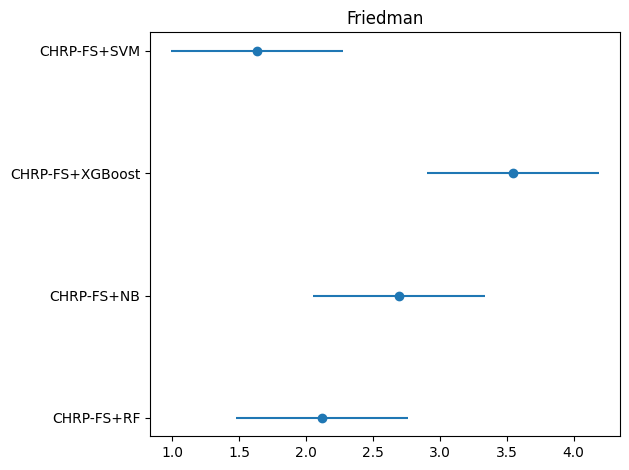

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 22 13:28:13 2019
@author: liuxin
"""

import numpy as np
import matplotlib.pyplot as plt
#from regression import linear_scores, ridge_scores, lasso_scores, elasticNet_scores

"""
    构造降序排序矩阵
"""
def rank_matrix(matrix):
    cnum = matrix.shape[1]
    rnum = matrix.shape[0]
    ## 升序排序索引
    sorts = np.argsort(matrix)
    for i in range(rnum):
        k = 1
        n = 0
        flag = False
        nsum = 0
        for j in range(cnum):
            n = n+1
            ## 相同排名评分序值
            if j < 3 and matrix[i, sorts[i,j]] == matrix[i, sorts[i,j + 1]]:
                flag = True;
                k = k + 1;
                nsum += j + 1;
            elif (j == 3 or (j < 3 and matrix[i, sorts[i,j]] != matrix[i, sorts[i,j + 1]])) and flag:
                nsum += j + 1
                flag = False;
                for q in range(k):
                    matrix[i,sorts[i,j - k + q + 1]] = nsum / k
                k = 1
                flag = False
                nsum = 0
            else:
                matrix[i, sorts[i,j]] = j + 1
                continue
    return matrix

"""
    Friedman检验
    参数：数据集个数n, 算法种数k, 排序矩阵rank_matrix(k x n)
    函数返回检验结果（对应于排序矩阵列顺序的一维数组）
"""
def friedman(n, k, rank_matrix):
    # 计算每一列的排序和
    sumr = sum(list(map(lambda x: np.mean(x) ** 2, rank_matrix.T)))
    result = 12 * n / (k * ( k + 1)) * (sumr - k * (k + 1) ** 2 / 4)
    result = (n - 1) * result /(n * (k - 1) - result)
    return result

"""
    Nemenyi检验
    参数：数据集个数n, 算法种数k, 排序矩阵rank_matrix(k x n)
    函数返回CD值
"""

def nemenyi(n, k, q):
    return q * (np.sqrt(k * (k + 1) / (6 * n)))
    

matrix = np.array([-data[0],-data[1],-data[2],-data[3]])
matrix_r = rank_matrix(matrix.T)
Friedman = friedman(28, 6, matrix_r)
CD = nemenyi(28, 6, 2.569)
##画CD图
rank_x = list(map(lambda x: np.mean(x), matrix))
name_y = ["CHRP-FS+RF","CHRP-FS+NB","CHRP-FS+XGBoost","CHRP-FS+SVM"]
#name_y = ["Standard", "Fisher", "HIP", "MR",'SHSEL','PRV','HHFS','CHRP-FS']
#name_y = ["Standard", "CFS", "HIP", "MR",'SHSEL','PRV','HHFS']
#name_y = ['HHFS+NB', 'HHFS+KNN', 'PRV+KNN', 'SHSEL+KNN', 'MR+SVM', 'HIP+KNN']
min_ = [x for x in rank_x - CD/2]
max_ = [x for x in rank_x + CD/2]


plt.title("Friedman")
plt.scatter(rank_x,name_y)
plt.hlines(name_y,min_,max_)
plt.tight_layout()
plt.savefig("Friedman_AUC.png",dpi=600)

In [182]:
data

,0,1,2,3,4
0,65.3,65.9,58.1,69.0,80.6
1,61.5,59.8,61.0,53.9,51.4
2,61.6,64.5,60.9,64.9,66.2
3,68.0,63.0,61.8,66.0,72.9
4,58.3,65.1,65.3,70.2,79.9
5,59.7,56.5,56.1,66.2,62.1
6,57.5,63.5,67.6,63.2,75.5
7,61.8,62.6,59.8,62.4,64.1
8,69.4,61.9,61.7,64.4,60.4
9,44.2,51.9,52.3,51.7,55.0


In [26]:
import scikit_posthocs as sp
import numpy as np
3.13 66%
#data = np.array([group1, group2, group3])
sp.posthoc_nemenyi_friedman(data)

,0,1,2,3,4,5
0,1.000000,0.900000,0.900000,0.900000,0.560112,0.001600
1,0.900000,1.000000,0.900000,0.900000,0.725132,0.004779
2,0.900000,0.900000,1.000000,0.900000,0.900000,0.016498
3,0.900000,0.900000,0.900000,1.000000,0.900000,0.032296
4,0.560112,0.725132,0.900000,0.900000,1.000000,0.231023
5,0.001600,0.004779,0.016498,0.032296,0.231023,1.000000


In [17]:
import Orange
import matplotlib.pyplot as plt
names = ["first", "third", "second", "fourth" ]
avranks =  [1.9, 3.2, 2.8, 3.3 ]
cd = Orange.evaluation.compute_CD(avranks, 30) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
plt.show()

ModuleNotFoundError: No module named 'Orange'